<center><h1><u>Image Analysis with Fashion MNIST</u>

<h2>1. Load libraries

In [72]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
%matplotlib inline 

In [102]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

<b><h2>2. Data Preparation</h2>


2.1. Load Data

In [4]:
train_df = pd.read_csv("fashionmnist/fashion-mnist_train.csv")
test_df = pd.read_csv("fashionmnist/fashion-mnist_test.csv")

In [5]:
train_label = train_df['label']
train_df.drop('label', axis=1, inplace=True)
test_label = test_df['label']
test_df.drop('label', axis=1, inplace=True)

<b>2.2 Examine Data

In [6]:
train_df.head()
#test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


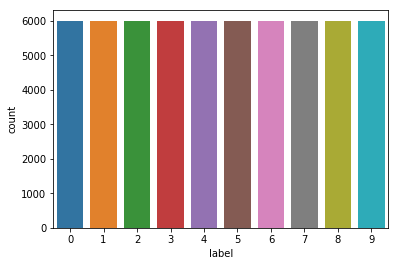

In [7]:
sb.countplot(train_label)

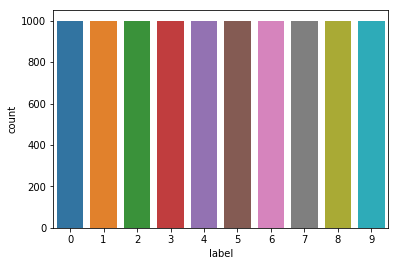

In [8]:
sb.countplot(test_label)

In [10]:
print(train_df.isnull().any().describe())
print(test_df.isnull().any().describe())

#no null values present in the databases

count       784
unique        1
top       False
freq        784
dtype: object
count       784
unique        1
top       False
freq        784
dtype: object


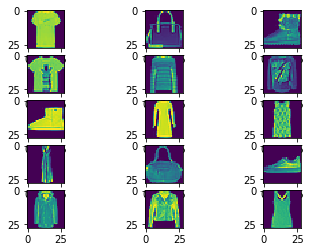

In [57]:
X = train_df.loc[0]
def draw_image(X):
    X = X.values.reshape([28, 28]);
    #print("The label is:",label)
    plt.imshow(X)
#modify the M, N values to display different images
M=10
N=25
j=1
for i in range(M,N):
    if(N%10==0): N=10
    else: N=N%10
    plt.subplot(N, 3, j)
    #plt.text(0.5, 0.5, str((5, 2, i)),fontsize=18, ha='center')
    draw_image(train_df.loc[i])
    j=j+1

In [58]:
x_train = np.array(train_df,dtype="float32")/255
y_train = np.array(train_label,dtype="float32")
x_test = np.array(test_df,dtype="float32")/255
y_test = np.array(test_label,dtype="float32")

In [59]:
x_train,x_validate,y_train,y_validate = train_test_split(
    x_train,y_train,test_size=0.2, random_state=12345,
)

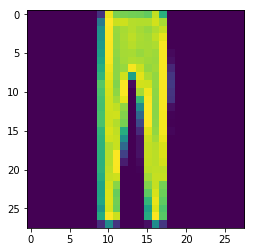

In [69]:
image = x_train[175,:].reshape((28,28))
plt.imshow(image)
plt.show()

<b><h1>Model Building</b></h1>

1. First trial with Keras


In [70]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows,im_cols,1) #KERAS requires a 3rd channel

x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*im_shape)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)
y_train = to_categorical(y_train, num_classes = 10)
#train_df.shape

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [12]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

In [13]:
cnn_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [14]:
cnn_model.fit(
    x_train,y_train,batch_size,epochs=10,verbose=1,
    validation_data=(x_validate,y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 41s 846us/step - loss: 0.7579 - acc: 0.7389 - val_loss: 0.4899 - val_acc: 0.8258
Epoch 2/10
48000/48000 [==============================] - 37s 774us/step - loss: 0.4584 - acc: 0.8382 - val_loss: 0.4306 - val_acc: 0.8463
Epoch 3/10
48000/48000 [==============================] - 35s 737us/step - loss: 0.4044 - acc: 0.8561 - val_loss: 0.3811 - val_acc: 0.8636
Epoch 4/10
48000/48000 [==============================] - 36s 756us/step - loss: 0.3708 - acc: 0.8705 - val_loss: 0.3505 - val_acc: 0.8790
Epoch 5/10
48000/48000 [==============================] - 37s 778us/step - loss: 0.3490 - acc: 0.8769 - val_loss: 0.3386 - val_acc: 0.8840
Epoch 6/10
48000/48000 [==============================] - 35s 724us/step - loss: 0.3338 - acc: 0.8819 - val_loss: 0.3322 - val_acc: 0.8835
Epoch 7/10
48000/48000 [==============================] - 35s 732us/step - loss: 0.3208 - acc: 0.8871 - val_loss: 0.

In [15]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


2. Let's deploy a better pipeline now

In [161]:
#standardize the values for faster convergence in CNN
x_train = np.array(train_df,dtype="float32")/255
y_train = np.array(train_label,dtype="float32")
x_test = np.array(test_df,dtype="float32")/255
y_test = np.array(test_label,dtype="float32")

#use one hot encoding for train labels
y_train = to_categorical(y_train, num_classes = 10)
#y_test = to_categorical(y_test,num_classes=10)
#reshape train and test for usage in Keras
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows,im_cols,1) #KERAS requires a 3rd channel

x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)



In [84]:
#split data
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=1234)

In [94]:
X_train[0][:,:,0]


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.46666667,  0.39607844,  0.38431373,  0.34901962,  0.30980393,
         0.32549021,  0.38039216,  0.34509805,  0.39607844,  0.07843138,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.08235294,
         0.56078434,  0.38431373,  0.42352942,  0.47843137,  0.50196081,
         0.48235294,  0.40784314,  0.36078432,  0.57647061,  0.33333334,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.24705882,
         0.91764706,  0.2941

In [113]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [114]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [119]:
model.fit(
    X_train,Y_train,batch_size,epochs=5,verbose=1,
    validation_data=(X_val,Y_val)
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 221s 4ms/step - loss: 0.4052 - acc: 0.8531 - val_loss: 0.3342 - val_acc: 0.8743
Epoch 2/5
54000/54000 [==============================] - 188s 3ms/step - loss: 0.3346 - acc: 0.8776 - val_loss: 0.3379 - val_acc: 0.8695
Epoch 3/5
54000/54000 [==============================] - 179s 3ms/step - loss: 0.2993 - acc: 0.8922 - val_loss: 0.2816 - val_acc: 0.8980
Epoch 4/5
54000/54000 [==============================] - 179s 3ms/step - loss: 0.2726 - acc: 0.9009 - val_loss: 0.2819 - val_acc: 0.9020
Epoch 5/5
54000/54000 [==============================] - 246s 5ms/step - loss: 0.2538 - acc: 0.9078 - val_loss: 0.2594 - val_acc: 0.9078


This denser network gives better results with higher accuracy and lower loss. BUT the loss is still to high, so figuring out ways to lower it. First thing I saw was adding a learning rate reduction

In [120]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [121]:
model.fit(
    X_train,Y_train,batch_size,epochs=1,verbose=1,
    validation_data=(X_val,Y_val),
    callbacks = [learning_rate_reduction]
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 204s 4ms/step - loss: 0.2386 - acc: 0.9126 - val_loss: 0.2294 - val_acc: 0.9155


In [126]:
X_val[1].shape

(28, 28, 1)

In [148]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)


NameError: name 'predictions' is not defined

In [165]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.91700000000000004

In [162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [163]:
cm

array([[883,   8,  14,  11,   0,   0,  80,   0,   4,   0],
       [  1, 992,   0,   5,   0,   1,   1,   0,   0,   0],
       [ 12,   2, 869,  10,  50,   1,  56,   0,   0,   0],
       [ 14,  12,   7, 937,  16,   0,  14,   0,   0,   0],
       [  0,   5,  38,  32, 864,   1,  60,   0,   0,   0],
       [  0,   2,   0,   0,   0, 984,   1,   8,   0,   5],
       [113,   3,  47,  19,  48,   0, 769,   0,   1,   0],
       [  0,   0,   0,   0,   0,   9,   0, 907,   0,  84],
       [  1,   3,   3,   1,   1,   2,   9,   1, 977,   2],
       [  0,   0,   0,   0,   0,   1,   0,  11,   0, 988]])

array([0, 1, 2, ..., 8, 8, 1])